In [435]:
import numpy as np
import pandas as pd
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import seaborn as sns
import pandas as pd
# from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import pickle
import csv
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from collections import Counter
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [288]:
data = pd.read_csv("/Users/shivanibalaji/Downloads/kdd_preprocessed.csv")

In [289]:
data.head()

,Unnamed: 0,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,...,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,appetency_labels,churn_labels,upselling_labels
0,0,1526.000000,7.0,184.0,464.000000,14.000000,166.56,0.0,3570.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,525.000000,0.0,0.0,168.000000,2.000000,353.52,0.0,4764966.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,5236.000000,7.0,904.0,1212.000000,26.000000,220.08,0.0,5883894.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,3,1326.437116,0.0,0.0,234.518225,4.507926,22.08,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1029.000000,7.0,3216.0,64.000000,4.000000,200.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
data.drop(['Unnamed: 0'], axis =1, inplace = True)

# Churn

In [291]:
x = data.drop(['appetency_labels', 'churn_labels', 'upselling_labels'], axis =1)
y_churn = data['churn_labels']

In [222]:
x_train, x_val, y_train_churn, y_val_churn = train_test_split(x, y_churn, test_size=0.2, random_state=21)

Number transactions X_train dataset:  (40000, 341)
Number transactions y_train dataset:  (40000,)
Number transactions X_test dataset:  (10000, 341)
Number transactions y_test dataset:  (10000,)


In [224]:
s1 = x_train[y_train_churn==0]
s2 = x_train[y_train_churn==1]
m1 = s1.mean()
m2 = s2.mean()
std1 = s1.std()
std2 = s2.std()
n1 = len(s1)
n2 = len(s2)

In [225]:
t_stats = np.abs(m1-m2)/np.sqrt((std1**2/n1) + (std2**2/n2))

In [226]:
t_stats =  abs(t_stats).sort_values(ascending = False)

In [227]:
top15_churn = t_stats.index[:15]

In [228]:
print("The top 15 best predictors are", list(top15_churn), sep = "\t")

The top 15 best predictors are	['Var212_NhsEn4L', 'Var7', 'Var193_RO12', 'Var228_F2FyR07IdsN7I', 'Var144', 'Var113', 'Var205_sJzTlal', 'Var126', 'Var13', 'Var74', 'Var193_2Knk1KF', 'Var207_me75fM6ugJ', 'Var207_7M47J5GA0pTYIFxg5uy', 'Var227_ZI9m', 'Var227_RAYp']


In [229]:
x_train_new = x_train[list(top15_churn)]
x_val_new = x_val[list(top15_churn)]

## Base Model:Logistic Regression - Churn

In [230]:
lreg_churn = LogisticRegression(random_state = 21)
lreg_churn.fit(x_train_new,y_train_churn)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=21)

In [231]:
y_train_pred_churn = lreg_churn.predict(x_train_new)
y_val_pred_churn = lreg_churn.predict(x_val_new)

In [232]:
train_accuracy = accuracy_score(y_train_churn, y_train_pred_churn)
validation_accuracy = accuracy_score(y_val_churn, y_val_pred_churn)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.91
Validation Accuracy 0.911


In [233]:
f1_churn = f1_score(y_val_churn, y_val_pred_churn)
print("f1 score is ", np.round(f1_churn,3))

f1 score is  0.073


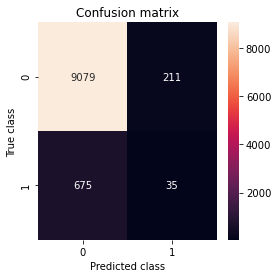

In [234]:
conf_matrix = confusion_matrix(y_val_churn, y_val_pred_churn)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [235]:
# predict probabilities
lreg_churn_probs = lreg_churn.predict_proba(x_val_new)
# keep probabilities for the positive outcome only
lreg_churn_probs = lreg_churn_probs[:, 1]
# calculate scores
lr_auc_churn = roc_auc_score(y_val_churn, lreg_churn_probs)

In [236]:
print('Logistic: ROC AUC=%.3f' % (lr_auc_churn))

Logistic: ROC AUC=0.584


## Decision Tree Model - Churn

In [244]:
DecisionTree_churn = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
DecisionTree_churn.fit(x_train_new, y_train_churn)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [246]:
y_train_pred_churn_dt = DecisionTree_churn.predict(x_train_new)
y_val_pred_churn_dt = DecisionTree_churn.predict(x_val_new)

In [247]:
train_accuracy = accuracy_score(y_train_churn, y_train_pred_churn_dt)
validation_accuracy = accuracy_score(y_val_churn, y_val_pred_churn_dt)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.997
Validation Accuracy 0.867


In [248]:
f1_churn_dt = f1_score(y_val_churn, y_val_pred_churn_dt)
print("f1 score is ", np.round(f1_churn_dt,3))

f1 score is  0.121


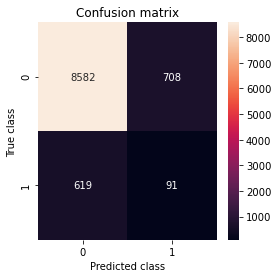

In [249]:
conf_matrix = confusion_matrix(y_val_churn, y_val_pred_churn_dt)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [250]:
dt_churn_probs = DecisionTree_churn.predict_proba(x_val_new)
dt_churn_probs = dt_churn_probs[:, 1]

# calculate scores
dt_auc_churn = roc_auc_score(y_val_churn, dt_churn_probs)

In [431]:
print('ROC AUC=%.3f' % (dt_auc_churn))

ROC AUC=0.526


In [441]:
print(classification_report(y_train_churn,y_train_pred_churn_dt ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37038
           1       0.96      1.00      0.98      2962

    accuracy                           1.00     40000
   macro avg       0.98      1.00      0.99     40000
weighted avg       1.00      1.00      1.00     40000



In [442]:
print(classification_report(y_val_churn,y_val_pred_churn_dt ))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9290
           1       0.11      0.13      0.12       710

    accuracy                           0.87     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.87      0.87      0.87     10000



# Decision Tree: Pruned - Churn

In [254]:
path= DecisionTree_churn.cost_complexity_pruning_path(x_train_new, y_train_churn)
 
#Get the alpha and impurity values for the tree
ccp_alphas= path.ccp_alphas
impurities = path.impurities

In [255]:
DT_alphas = []
#your code here

ccp_alphas = ccp_alphas[:-1]

dtree_models=[]
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(ccp_alpha = ccp_alpha, random_state = 1, class_weight = 'balanced')
    dtree.fit(x_train_new, y_train_churn)
    dtree_models.append(dtree)


In [292]:
train_scores = [roc_auc_score(y_train_churn, x.predict_proba(x_train_new)[:, 1]) for x in dtree_models]

test_scores = [roc_auc_score(y_val_churn, x.predict_proba(x_val_new)[:, 1]) for x in dtree_models]


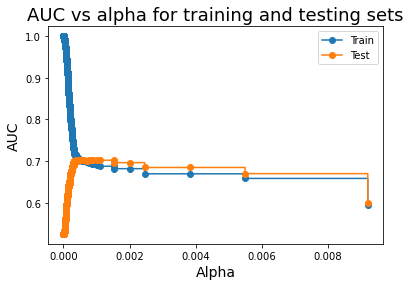

In [303]:
#Plot the train and test scores vs. the alpha
plt.xlabel("Alpha", fontsize = 14)
plt.ylabel("AUC", fontsize = 14)
plt.title("AUC vs alpha for training and testing sets", fontsize = 18)
plt.plot(ccp_alphas, train_scores, drawstyle="steps-post", marker='o')
plt.plot(ccp_alphas, test_scores, drawstyle="steps-post", marker='o')
plt.legend(['Train', 'Test'])
plt.show()

In [294]:
score = pd.DataFrame(list(zip(train_scores, test_scores, ccp_alphas)), 
               columns =['train', 'test', 'alpha'])

In [295]:
best_index = score.test.idxmax()
best_alpha = score.alpha[best_index]
np.round(best_alpha,3)

0.0

In [296]:
dt_test= DecisionTreeClassifier(ccp_alpha = best_alpha, random_state = 21, class_weight = 'balanced')
dt_test.fit(x_train_new, y_train_churn)

DecisionTreeClassifier(ccp_alpha=0.00047940524063439655,
                       class_weight='balanced', random_state=21)

In [297]:
y_predicted_train_alpha = dt_test.predict(x_train_new)
y_predicted_val_alpha = dt_test.predict(x_val_new)

In [298]:
train_accuracy = accuracy_score(y_train_churn, y_predicted_train_alpha)
validation_accuracy = accuracy_score(y_val_churn, y_predicted_val_alpha)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.562
Validation Accuracy 0.551


In [299]:
f1_churn_dt = f1_score(y_val_churn, y_predicted_val_alpha)
print("f1 score is ", np.round(f1_churn_dt,3))

f1 score is  0.19


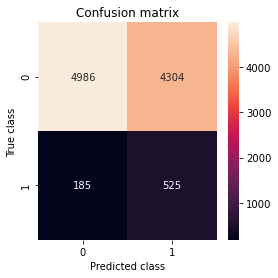

In [300]:
conf_matrix = confusion_matrix(y_val_churn, y_predicted_val_alpha)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [301]:
dt_churn_probs_alpha = dt_test.predict_proba(x_val_new)
dt_churn_probs_alpha = dt_churn_probs_alpha[:, 1]

# calculate scores
dt_auc_churn_alpha = roc_auc_score(y_val_churn, dt_churn_probs_alpha)

In [432]:
print('ROC AUC=%.3f' % (dt_auc_churn_alpha))

ROC AUC=0.704


In [439]:
print(classification_report(y_train_churn,y_predicted_train_alpha ))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70     37038
           1       0.12      0.74      0.20      2962

    accuracy                           0.56     40000
   macro avg       0.54      0.64      0.45     40000
weighted avg       0.90      0.56      0.66     40000



In [440]:
print(classification_report(y_val_churn,y_predicted_val_alpha ))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69      9290
           1       0.11      0.74      0.19       710

    accuracy                           0.55     10000
   macro avg       0.54      0.64      0.44     10000
weighted avg       0.90      0.55      0.65     10000



## Pruning Single Decision Tree by Depth

In [304]:
from sklearn.model_selection import cross_val_score 

In [492]:
auc_scores = []
cv_scores_list = []
depth, tree_start, tree_end = [40, 42, 44, 46, 48, 50, 52, 54, 56, 58], 0, 10 #Testing different depths to find best depth
for i in range(tree_start, tree_end):
    tree_model = DecisionTreeClassifier(max_depth=depth[i], min_samples_split=10, class_weight = 'balanced')
    cv_scores = cross_val_score(tree_model, x_train_new, y_train_churn, cv=5, scoring="roc_auc")
    cv_scores_list.append(cv_scores.mean())
    tree_model.fit(x_train_new, y_train_churn)
    auc_scores.append(roc_auc_score(y_train_churn, tree_model.predict_proba(x_train_new)[:, 1]))

cv_scores_list = np.array(cv_scores_list)
auc_scores = np.array(auc_scores)


In [493]:
np.argmax(cv_scores_list)

8

In [494]:
max(cv_scores_list)

0.5473971757879124

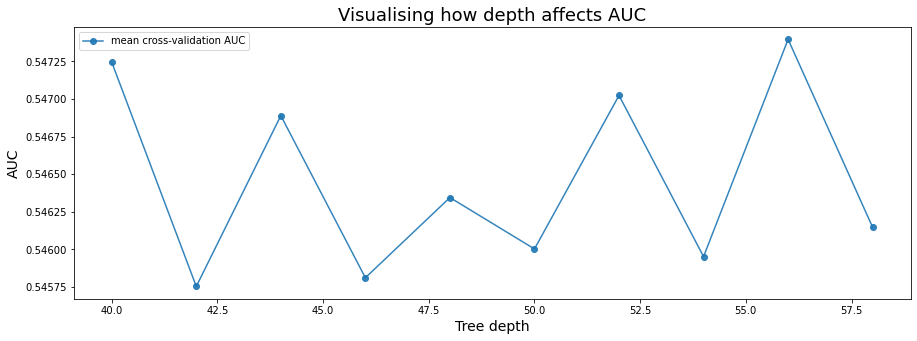

In [495]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(depth, cv_scores_list, '-o', label='mean cross-validation AUC', alpha=0.9)
ax.set_title("Visualising how depth affects AUC", fontsize=18)
ax.set_xlabel('Tree depth', fontsize=14)
ax.set_ylabel('AUC', fontsize=14)
ax.legend()

plt.show()

In [496]:
best_depth =  depth[np.argmax(cv_scores_list)]
best_depth

56

## DT Max depth

In [497]:
#fit the model
DT_max_depth = DecisionTreeClassifier(max_depth= best_depth, min_samples_split=10, random_state = 21, class_weight = 'balanced')

In [498]:
#Performance
DT_max_depth.fit(x_train_new, y_train_churn)
y_pred_val_depth = DT_max_depth.predict(x_val_new)
y_pred_train_depth = DT_max_depth.predict(x_train_new)

In [499]:
train_accuracy = accuracy_score(y_train_churn, y_pred_train_depth)
validation_accuracy = accuracy_score(y_val_churn, y_pred_val_depth)
print("Train Accuracy", np.round(train_accuracy,3))
print("Validation Accuracy", np.round(validation_accuracy,3))

Train Accuracy 0.913
Validation Accuracy 0.8


In [500]:
f1_churn_dt = f1_score(y_val_churn, y_pred_val_depth)
print("f1 score is ", np.round(f1_churn_dt,3))

f1 score is  0.147


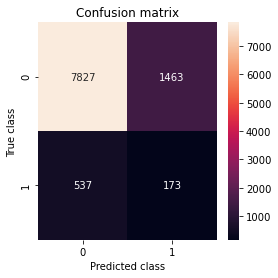

In [501]:
conf_matrix = confusion_matrix(y_val_churn, y_pred_val_depth)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix,  annot=True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [502]:
dt_churn_probs_depth = DT_max_depth.predict_proba(x_val_new)
dt_churn_probs_depth = dt_churn_probs_depth[:, 1]

# calculate scores
dt_auc_churn_depth = roc_auc_score(y_val_churn, dt_churn_probs_depth)

In [503]:
print('ROC AUC=%.3f' % (dt_auc_churn_depth))

ROC AUC=0.544


In [504]:
print(classification_report(y_train_churn,y_pred_train_depth ))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     37038
           1       0.46      1.00      0.63      2962

    accuracy                           0.91     40000
   macro avg       0.73      0.95      0.79     40000
weighted avg       0.96      0.91      0.93     40000



In [505]:
print(classification_report(y_val_churn,y_pred_val_depth ))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      9290
           1       0.11      0.24      0.15       710

    accuracy                           0.80     10000
   macro avg       0.52      0.54      0.52     10000
weighted avg       0.88      0.80      0.83     10000

